In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen=ImageDataGenerator(rescale=1./255)
x_train=train_datagen.flow_from_directory(r"/content/drive/MyDrive/dataset/veg-dataset/train-set",target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 9016 images belonging to 10 classes.


In [4]:
x_test=test_datagen.flow_from_directory(r'/content/drive/MyDrive/dataset/veg-dataset/test-set',target_size=(128,128),
                                        class_mode='categorical',batch_size=24)

Found 3241 images belonging to 10 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(9,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
len(x_train)

376

In [ ]:
model.fit(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

In [8]:
model.save('vegetabledata.h5')

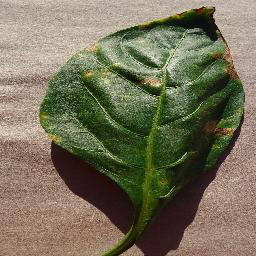

In [12]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('vegetabledata.h5')
img=image.load_img(r"/content/drive/MyDrive/dataset/veg-dataset/test-set/Pepper,_bell___Bacterial_spot/ae40949c-47ac-49ce-9a5d-00e15fa79d66___NREC_B.Spot 1785.JPG")
img

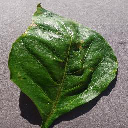

In [14]:
x=image.img_to_array(img)
img=image.load_img(r"/content/drive/MyDrive/dataset/veg-dataset/test-set/Pepper,_bell___Bacterial_spot/afc76c77-fd2d-4b7f-b1ad-14ba4d5fe297___NREC_B.Spot 9113.JPG",target_size=(128,128))
img

In [15]:
x=image.img_to_array(img)
x

array([[[201., 195., 197.],
        [202., 196., 198.],
        [199., 193., 195.],
        ...,
        [182., 176., 178.],
        [179., 173., 175.],
        [177., 171., 173.]],

       [[206., 200., 202.],
        [206., 200., 202.],
        [202., 196., 198.],
        ...,
        [178., 172., 174.],
        [180., 174., 176.],
        [181., 175., 177.]],

       [[192., 186., 188.],
        [198., 192., 194.],
        [211., 205., 207.],
        ...,
        [180., 174., 176.],
        [173., 167., 169.],
        [174., 168., 170.]],

       ...,

       [[147., 135., 137.],
        [129., 117., 119.],
        [138., 126., 128.],
        ...,
        [170., 158., 160.],
        [114., 102., 104.],
        [110.,  98., 100.]],

       [[109.,  97.,  99.],
        [118., 106., 108.],
        [133., 121., 123.],
        ...,
        [138., 126., 128.],
        [140., 128., 130.],
        [149., 137., 139.]],

       [[134., 122., 124.],
        [124., 112., 114.],
        [131., 1

In [16]:
x=np.expand_dims(x,axis=0)
x

array([[[[201., 195., 197.],
         [202., 196., 198.],
         [199., 193., 195.],
         ...,
         [182., 176., 178.],
         [179., 173., 175.],
         [177., 171., 173.]],

        [[206., 200., 202.],
         [206., 200., 202.],
         [202., 196., 198.],
         ...,
         [178., 172., 174.],
         [180., 174., 176.],
         [181., 175., 177.]],

        [[192., 186., 188.],
         [198., 192., 194.],
         [211., 205., 207.],
         ...,
         [180., 174., 176.],
         [173., 167., 169.],
         [174., 168., 170.]],

        ...,

        [[147., 135., 137.],
         [129., 117., 119.],
         [138., 126., 128.],
         ...,
         [170., 158., 160.],
         [114., 102., 104.],
         [110.,  98., 100.]],

        [[109.,  97.,  99.],
         [118., 106., 108.],
         [133., 121., 123.],
         ...,
         [138., 126., 128.],
         [140., 128., 130.],
         [149., 137., 139.]],

        [[134., 122., 124.],
       

In [17]:
y=np.argmax(model.predict(x),axis=1)

1/1 [==============================] - 0s 102ms/step


In [18]:
x_train.class_indices

{'.ipynb_checkpoints': 0,
 'Pepper,_bell___Bacterial_spot': 1,
 'Pepper,_bell___healthy': 2,
 'Potato___Early_blight': 3,
 'Potato___Late_blight': 4,
 'Potato___healthy': 5,
 'Tomato___Bacterial_spot': 6,
 'Tomato___Late_blight': 7,
 'Tomato___Leaf_Mold': 8,
 'Tomato___Septoria_leaf_spot': 9}

In [19]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

'Potato___Early_blight'

In [21]:
img=image.load_img(r"/content/drive/MyDrive/dataset/veg-dataset/test-set/Pepper,_bell___Bacterial_spot/afc76c77-fd2d-4b7f-b1ad-14ba4d5fe297___NREC_B.Spot 9113.JPG",target_size=(128,128))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy','Tomato___Bacterial_spot','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot']
index[y[0]]

1/1 [==============================] - 0s 33ms/step


'Potato___Early_blight'